In [1]:
from azure.storage.blob import BlobServiceClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Define storage account credentials
storage_account_name = 'studentdatasetedacw'
storage_account_key = 'KnDT/xTdiGrIhj2xaYrxgSpjIYQIwbz0PTBb9RMUc37qUK50fq2coM2ObwlUgNKyabTX4HkmXuR6+ASt1sGdxg=='
container_name = 'data-lake-container'
blob_name = 'student-mat.csv'

In [3]:
# Create a BlobServiceClient
connection_string = f"DefaultEndpointsProtocol=https;AccountName={storage_account_name};AccountKey={storage_account_key};EndpointSuffix=core.windows.net"
blob_service_client = BlobServiceClient.from_connection_string(connection_string)

In [7]:
# Get the blob client
blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)

In [9]:
# Download the blob to a local file
with open('local_file.csv', 'wb') as download_file:
    download_file.write(blob_client.download_blob().readall())

In [10]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('local_file.csv', delimiter=';')

print(df.head())
print(df.info())
print(df.describe())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [13]:
# Step 2: Data Cleaning and Preprocessing
# Remove spaces from column names
df.columns = df.columns.str.strip()

# Select relevant columns
df_cleaned = df[['Dalc', 'Walc', 'G1', 'G2', 'G3']]

# Check for missing values
print("Missing Values:\n", df_cleaned.isnull().sum())

# Descriptive statistics
print("\nDescriptive Statistics:\n", df_cleaned.describe())

Missing Values:
 Dalc    0
Walc    0
G1      0
G2      0
G3      0
dtype: int64

Descriptive Statistics:
              Dalc        Walc          G1          G2          G3
count  395.000000  395.000000  395.000000  395.000000  395.000000
mean     1.481013    2.291139   10.908861   10.713924   10.415190
std      0.890741    1.287897    3.319195    3.761505    4.581443
min      1.000000    1.000000    3.000000    0.000000    0.000000
25%      1.000000    1.000000    8.000000    9.000000    8.000000
50%      1.000000    2.000000   11.000000   11.000000   11.000000
75%      2.000000    3.000000   13.000000   13.000000   14.000000
max      5.000000    5.000000   19.000000   19.000000   20.000000


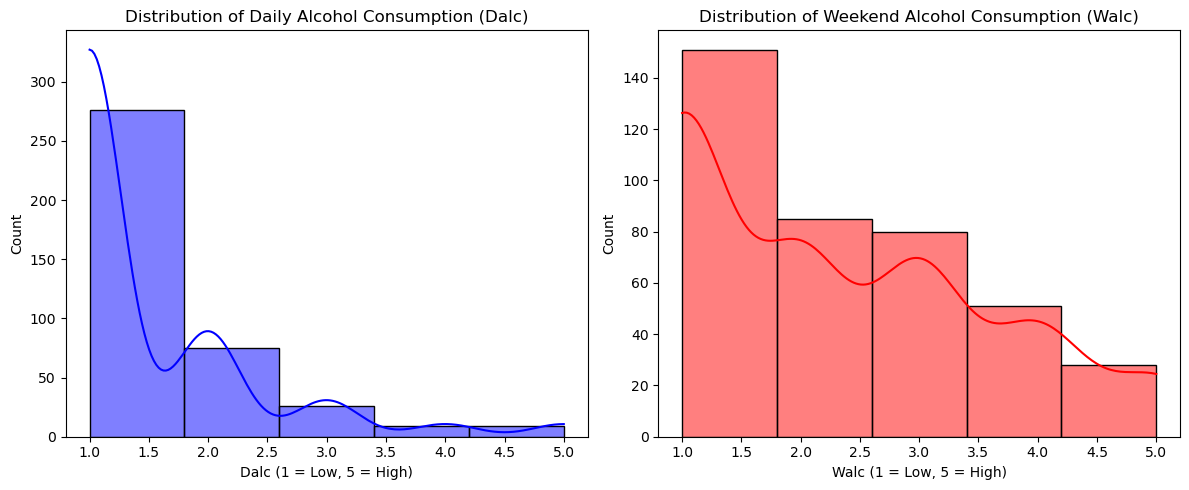

In [17]:
# Step 3: Visualizing Alcohol Consumption Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Dalc'], bins=5, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Daily Alcohol Consumption (Dalc)")
axes[0].set_xlabel("Dalc (1 = Low, 5 = High)")
axes[0].set_ylabel("Count")

sns.histplot(df['Walc'], bins=5, kde=True, ax=axes[1], color="red")
axes[1].set_title("Distribution of Weekend Alcohol Consumption (Walc)")
axes[1].set_xlabel("Walc (1 = Low, 5 = High)")
axes[1].set_ylabel("Count")
plt.tight_layout()
plt.show()

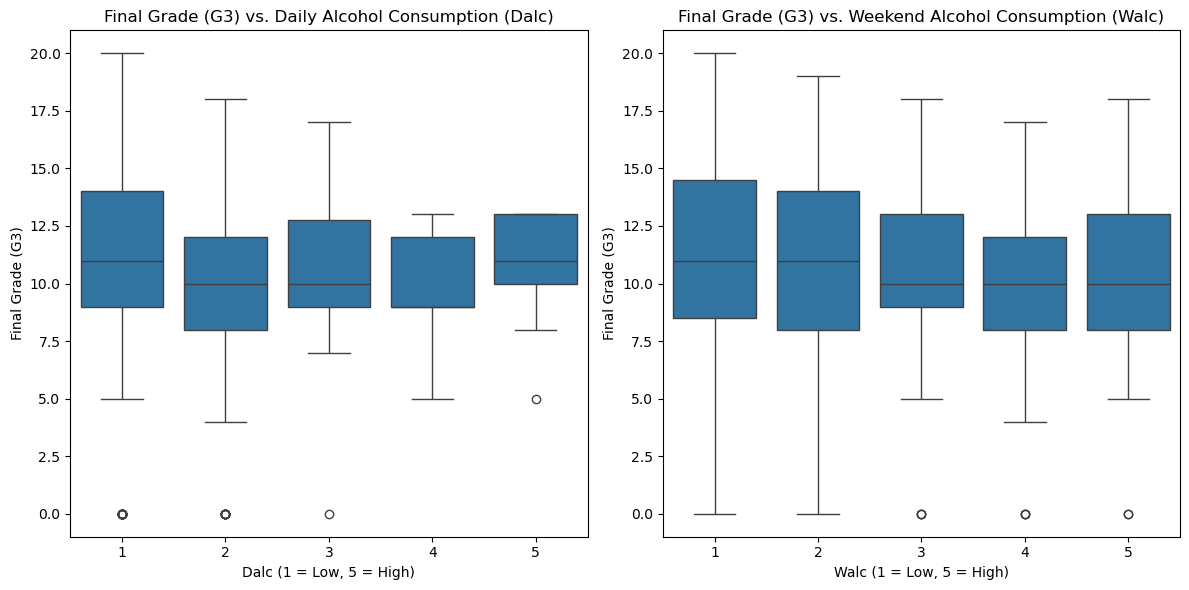

In [23]:
# Step 3: Relationship Between Alcohol Consumption & Final Grades
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(x=df['Dalc'], y=df['G3'], ax=axes[0])
axes[0].set_title("Final Grade (G3) vs. Daily Alcohol Consumption (Dalc)")
axes[0].set_xlabel("Dalc (1 = Low, 5 = High)")
axes[0].set_ylabel("Final Grade (G3)")

sns.boxplot(x=df['Walc'], y=df['G3'], ax=axes[1])
axes[1].set_title("Final Grade (G3) vs. Weekend Alcohol Consumption (Walc)")
axes[1].set_xlabel("Walc (1 = Low, 5 = High)")
axes[1].set_ylabel("Final Grade (G3)")
plt.tight_layout()
plt.show()